In [1]:
import tensorflow as tf
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


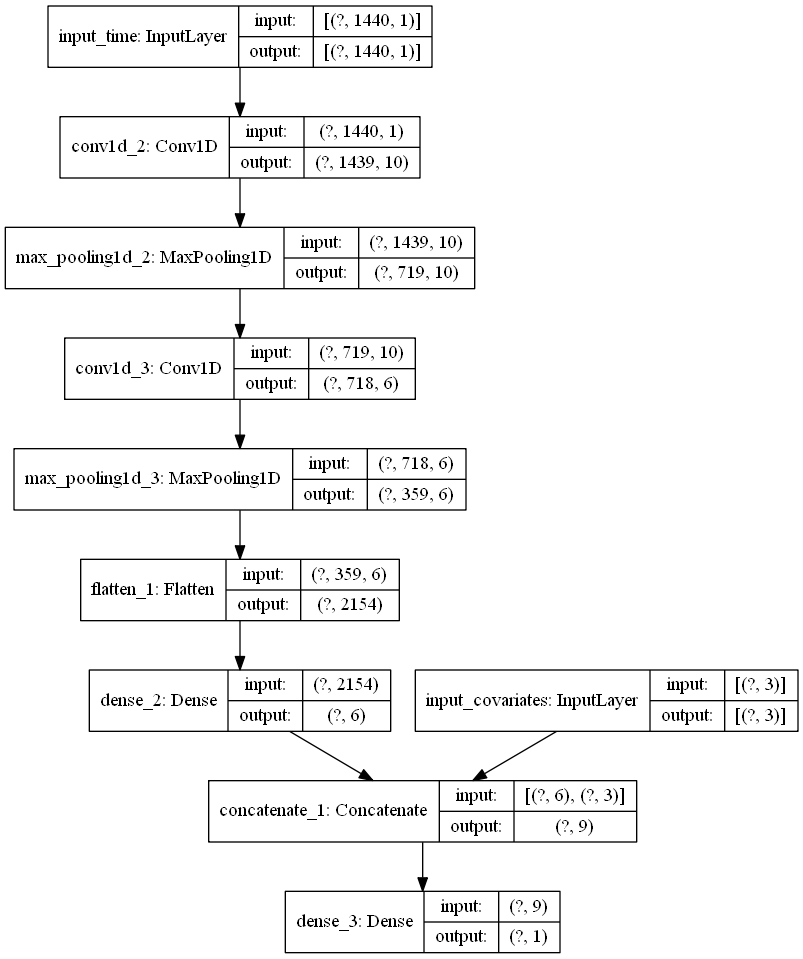

In [3]:
time_input = tf.keras.Input(shape = (1440,1),
                         name = 'input_time')

time_output = Sequential(
    [
        time_input,
        tf.keras.layers.Conv1D(filters = 2^8, kernel_size = 2, activation = "relu"),
        tf.keras.layers.MaxPooling1D(pool_size = 2),
        tf.keras.layers.Conv1D(filters = 2^4, kernel_size = 2, activation = "relu"),
        tf.keras.layers.MaxPooling1D(pool_size = 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 2^4, activation = "relu")
    ]
) 

# time_output.summary()

covariates_input = tf.keras.Input(shape = (3),
                               name = 'input_covariates')


covariates_output = Sequential(
    [
        covariates_input
    ]
)
# covariates_output.summary()

concatenate_layer = tf.keras.layers.Concatenate(axis=-1)([time_output.outputs[0], covariates_output.outputs[0]])
output_layer = tf.keras.layers.Dense(1, activation='linear')(concatenate_layer)

model_CNN = tf.keras.Model(
  inputs = [time_input,covariates_input],
  outputs = output_layer
)

model_CNN.compile(
 loss = "mse",
 optimizer = "adam",
 metrics = list("mean_absolute_error")
)

from keras.utils.vis_utils import plot_model
plot_model(model_CNN, to_file='model_CNN.png', show_shapes=True, show_layer_names=True)



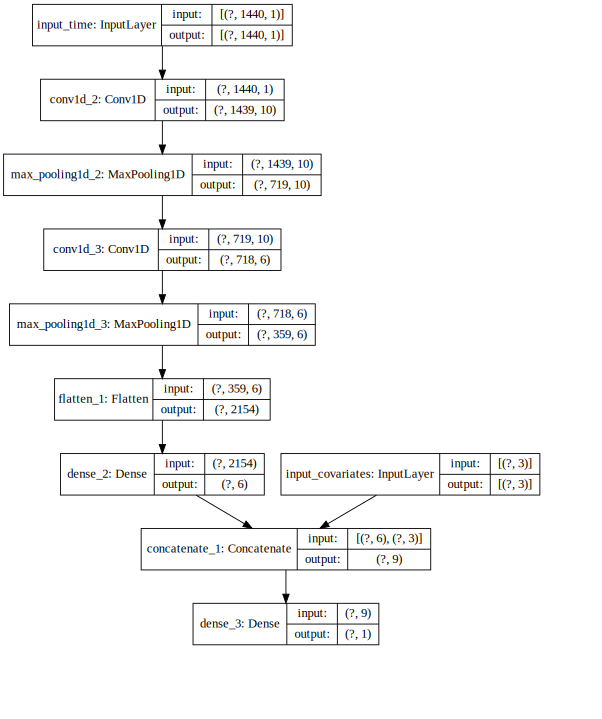

In [4]:
from IPython.display import SVG
SVG(tf.keras.utils.model_to_dot(model_CNN, dpi = 65, show_shapes= True, show_layer_names=True).create(prog='dot', format='svg'))